# RANDOM FOREST

## import libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
#from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_score, recall_score, f1_score)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

## read the dataset

In [2]:
# Mount Google Drive (persistent storage)
#drive.mount('/content/drive')
# Load dataset (replace with your path)
file_path = 'combined_dataset.csv'
data = pd.read_csv(file_path)


In [3]:

# Data Preprocessing
print("Original shape:", data.shape)


Original shape: (28789809, 13)


In [4]:
# Handle missing values
data = data.dropna()
print("After dropping NA:", data.shape)


After dropping NA: (28789809, 13)


## see the number of samoles for each class

In [5]:
data["Label"].value_counts()

Label
1    20007392
0     8782417
Name: count, dtype: int64

## split data for training and testing 

In [6]:

# Feature-Target Split
X = data.drop('Label', axis=1)
y = data['Label']

# Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTrain samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")



Train samples: 20152866, Test samples: 8636943


## Training and Evaluation


Training Random Forest...

=== Evaluation Metrics ===
Accuracy: 0.9938
Precision: 1.0000
Recall: 0.9911
F1-Score: 0.9955


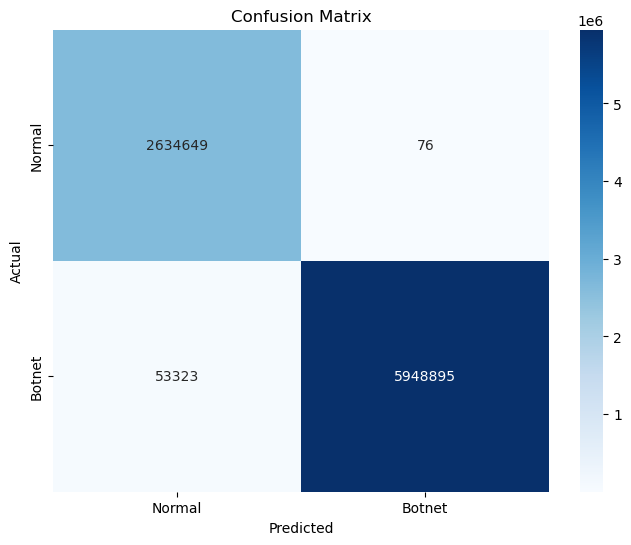


=== Classification Report ===
              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99   2634725
      Botnet       1.00      0.99      1.00   6002218

    accuracy                           0.99   8636943
   macro avg       0.99      1.00      0.99   8636943
weighted avg       0.99      0.99      0.99   8636943



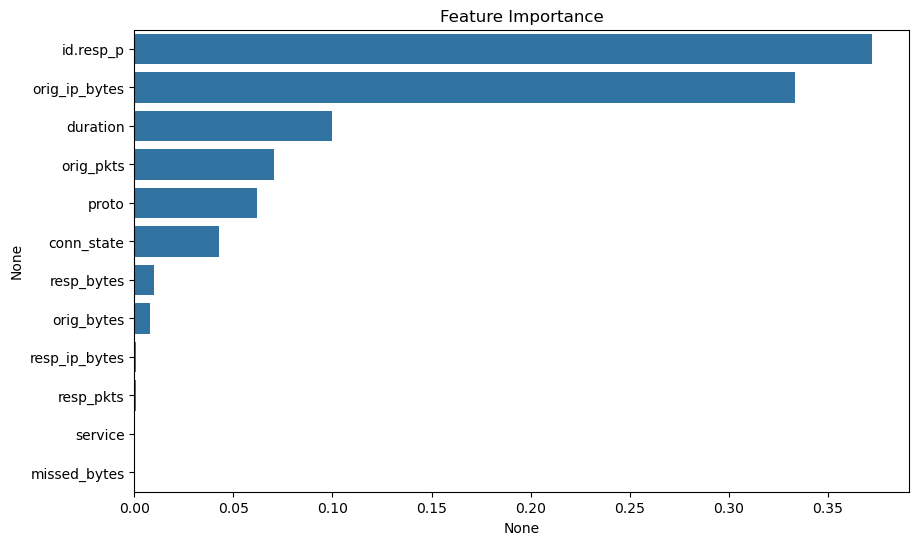

In [7]:





# Optimized Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=150,        # Number of trees
    max_depth=20,            # Maximum tree depth
    min_samples_split=5,     # Minimum samples to split node
    min_samples_leaf=2,      # Minimum samples at leaf node
    max_features='sqrt',     # Features considered at each split
    class_weight='balanced', # Handles class imbalance
    n_jobs=-1,               # Use all CPU cores
    random_state=42
)

# Training with timing
print("\nTraining Random Forest...")
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Evaluation Metrics
print("\n=== Evaluation Metrics ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Botnet'],
            yticklabels=['Normal', 'Botnet'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Botnet']))

# Feature Importance
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()


## save the model to use it in simulation

In [8]:

# Save the trained model
model_path = '150Random_Forestf_model.pkl'
joblib.dump(rf, model_path)
print(f"\nModel saved to: {model_path}")

# For future loading:
# loaded_model = joblib.load(model_path)


Model saved to: 150Random_Forestf_model.pkl
